# Notebook Imports

In [4]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"


raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])


target = raw_df.values[1::2, 2]
from sklearn.utils import Bunch

boston_dataset = Bunch(
    data=data,
    target=target,
    feature_names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"],
    DESCR="Boston Housing Prices dataset",
)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [6]:
print(*target)

24.0 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.0 18.9 21.7 20.4 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8 18.4 21.0 12.7 14.5 13.2 13.1 13.5 18.9 20.0 21.0 24.7 30.8 34.9 26.6 25.3 24.7 21.2 19.3 20.0 16.6 14.4 19.4 19.7 20.5 25.0 23.4 18.9 35.4 24.7 31.6 23.3 19.6 18.7 16.0 22.2 25.0 33.0 23.5 19.4 22.0 17.4 20.9 24.2 21.7 22.8 23.4 24.1 21.4 20.0 20.8 21.2 20.3 28.0 23.9 24.8 22.9 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.0 22.9 25.0 20.6 28.4 21.4 38.7 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.0 20.3 20.5 17.3 18.8 21.4 15.7 16.2 18.0 14.3 19.2 19.6 23.0 18.4 15.6 18.1 17.4 17.1 13.3 17.8 14.0 14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4 17.0 15.6 13.1 41.3 24.3 23.3 27.0 50.0 50.0 50.0 22.7 25.0 50.0 23.8 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2 37.9 32.5 26.4 29.6 50.0 32.0 29.8 34.9 37.0 30.5 36.4 31.1 29.1 50.0 33.3 30.3 34.6 34.9 

# Gather Data

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data explorations with Pandas dataframes

In [9]:
# Create a pandas DataFrame
data = pd.DataFrame(data = boston_dataset.data,columns = boston_dataset.feature_names)
# Add columns with the price (target)
data['PRICE'] = boston_dataset.target

In [10]:
data.head()  # rows at the begginnig 

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [11]:
data.tail() # rows at the ens

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [12]:
data.count() # show us number of row

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data - check for missing values

In [13]:
pd.isnull(data).any() # check for missing data

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Chars

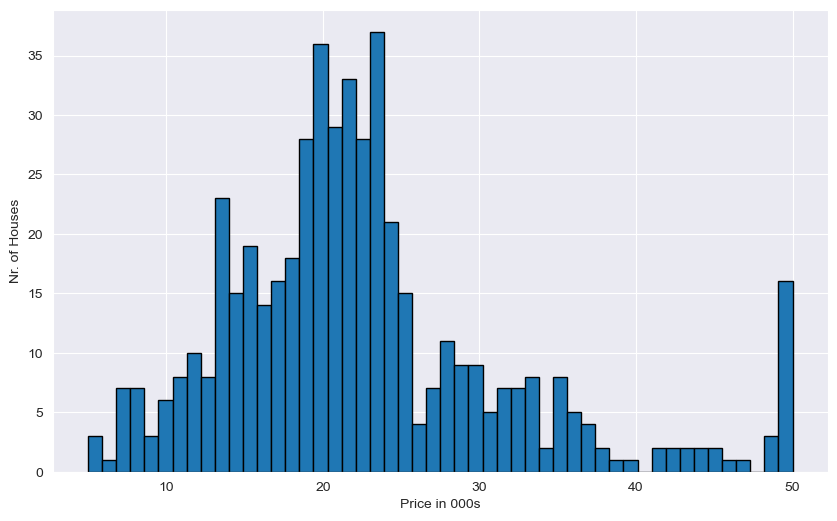

In [15]:
plt.figure(figsize = [10,6])
plt.xlabel("Price in 000s")
plt.ylabel("Nr. of Houses")


plt.hist(data['PRICE'],bins = 50,ec = 'black')
plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

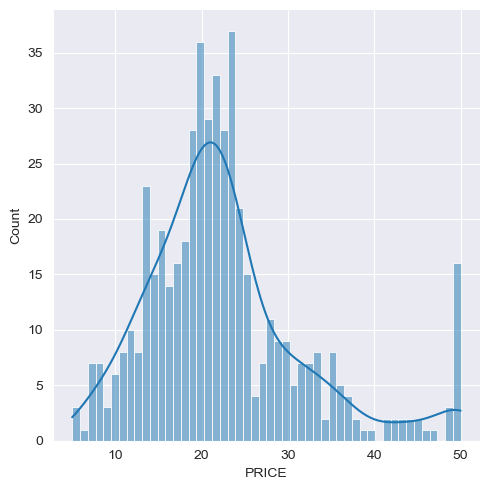

In [16]:
plt.figure(figsize = (10,6))
sns.displot(data['PRICE'],bins = 50,kde = True)
plt.show()

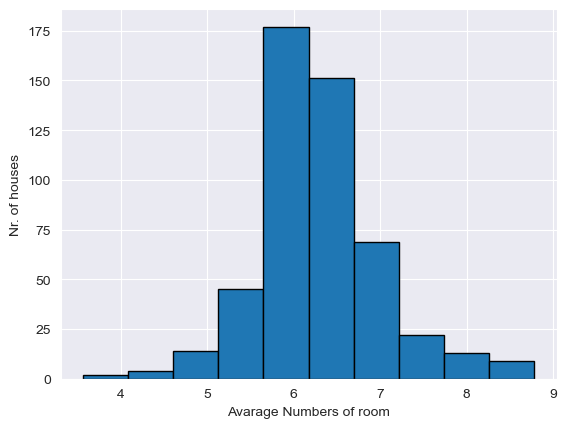

In [17]:
plt.hist(data["RM"],ec = 'black')
plt.xlabel("Avarage Numbers of room")
plt.ylabel("Nr. of houses")
plt.show()

In [18]:
data['RM'].mean() # avarage number of rooms

6.284634387351779

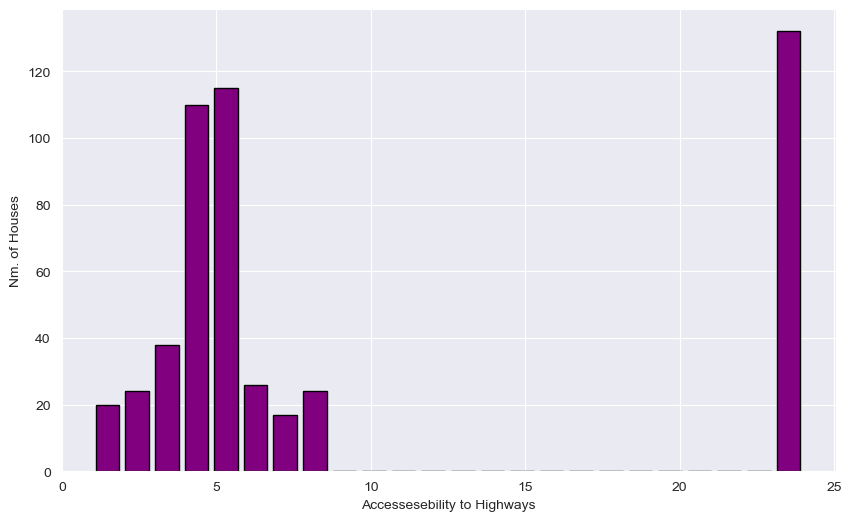

In [19]:
plt.figure(figsize = [10,6])

plt.hist(data["RAD"],bins = 24,ec = 'black',color = 'purple',rwidth=0.8)
plt.xlabel('Accessesebility to Highways')
plt.ylabel('Nm. of Houses')
plt.show()

In [20]:
data["RAD"].value_counts()

RAD
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: count, dtype: int64

In [21]:
frequency = data["RAD"].value_counts()

In [22]:
type(frequency)

pandas.core.series.Series

In [23]:
frequency.index

Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64', name='RAD')

In [24]:
frequency.axes[0]

Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64', name='RAD')

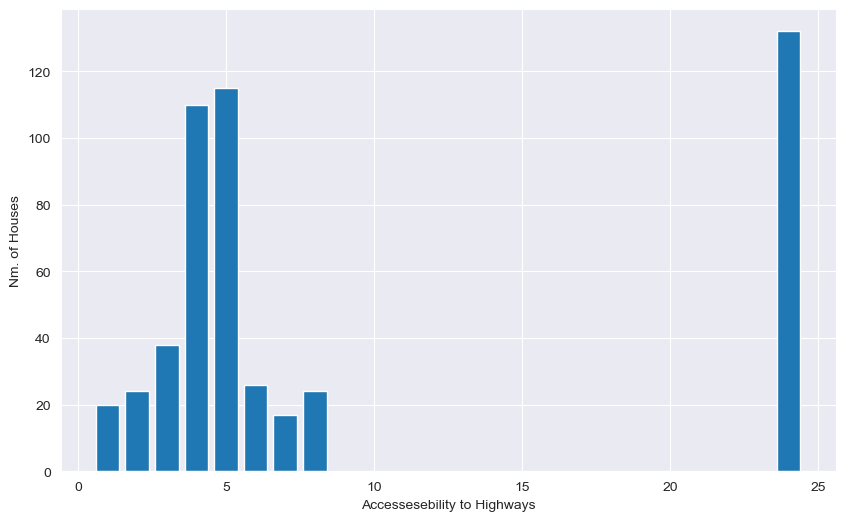

In [25]:
plt.figure(figsize = [10,6])


plt.xlabel('Accessesebility to Highways')
plt.ylabel('Nm. of Houses')

plt.bar(frequency.index,height=frequency)
plt.show()

In [26]:
print(data['CHAS'].value_counts())

CHAS
0.0    471
1.0     35
Name: count, dtype: int64


## Descriptive Statistics

In [27]:
data['PRICE'].min()

5.0

In [28]:
data['PRICE'].mean() # Average value

22.532806324110677

In [29]:
data['PRICE'].max()

50.0

In [30]:
data['PRICE'].median()

21.2

In [31]:
data.min() # min data for each column

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [32]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Corelation
## $$ \rho_{XY} = corr(X,Y) $$
## $$ -1.0 \leq \rho_{XY} <= 1 $$

In [33]:
print(data['PRICE'].corr(data['RM']))

0.6953599470715396


In [34]:
data.corr() # corr for all the values # Pearson Correlations Coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [35]:
mask = np.zeros_like(data.corr())
triangle_idices = np.triu_indices_from(mask)
mask[triangle_idices] = True

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


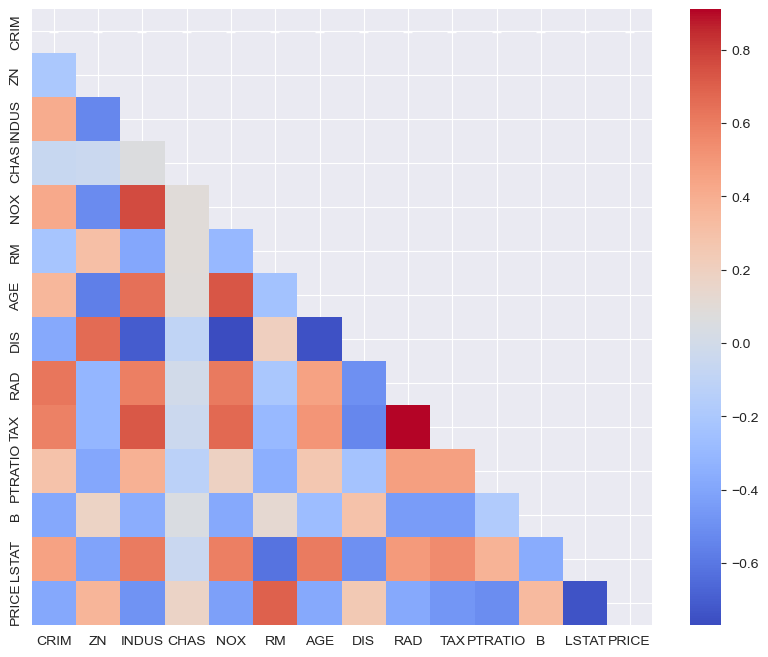

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, mask=mask, annot_kws={"size": 12}, cmap='coolwarm', fmt=".2f")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [37]:
# Nox - міра забруднення and DIS - віднтань від центрів зайнятості 


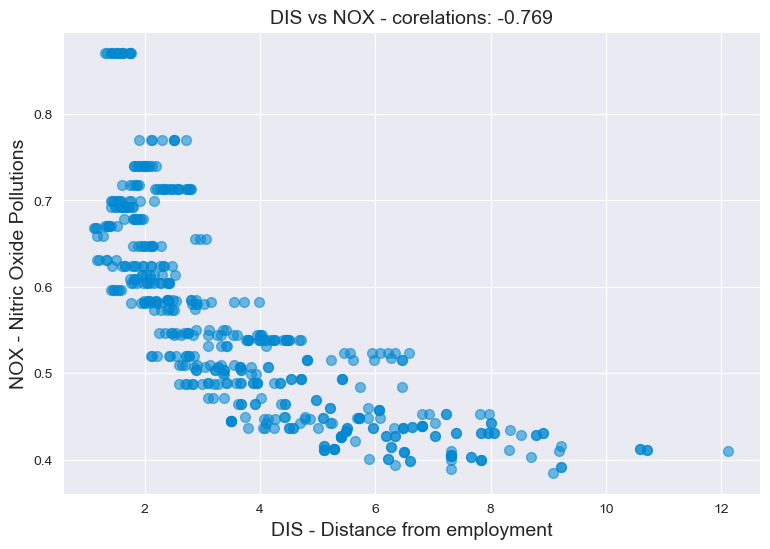

In [38]:
nox_dis_corr = round(data['NOX'].corr(data["DIS"]),3)

plt.figure(figsize = (9,6))

plt.scatter(data["DIS"],data["NOX"], c = "#0288d1",s = 50, alpha = 0.55)
plt.title(f"DIS vs NOX - corelations: {nox_dis_corr}",fontsize = 14)
plt.xlabel("DIS - Distance from employment",fontsize = 14)
plt.ylabel("NOX - Nitric Oxide Pollutions",fontsize = 14)
plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


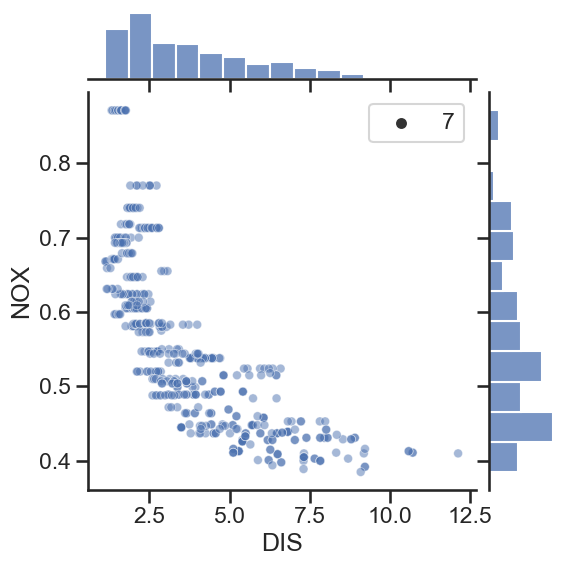

In [39]:
sns.set()
sns.set_style("ticks")
sns.set_context("talk")
sns.jointplot(x=data['DIS'],y=data['NOX'],size = 7,joint_kws={"alpha":0.5})

plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


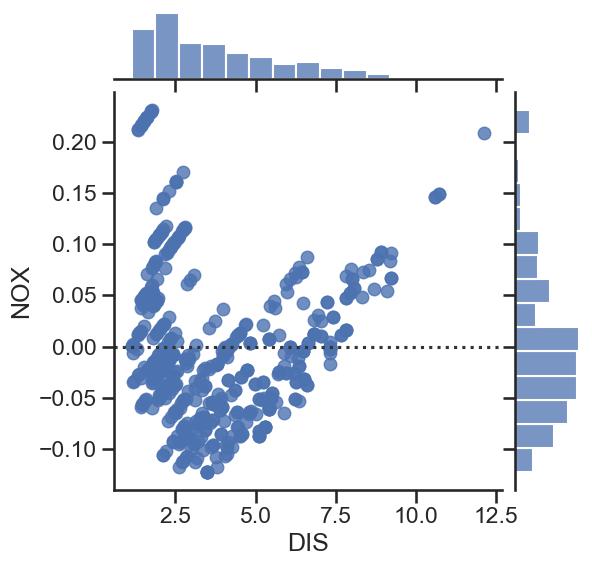

In [40]:
sns.set()
sns.set_style("ticks")
sns.set_context("talk")
sns.jointplot(x=data['DIS'],y=data['NOX'],kind ="resid")

plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


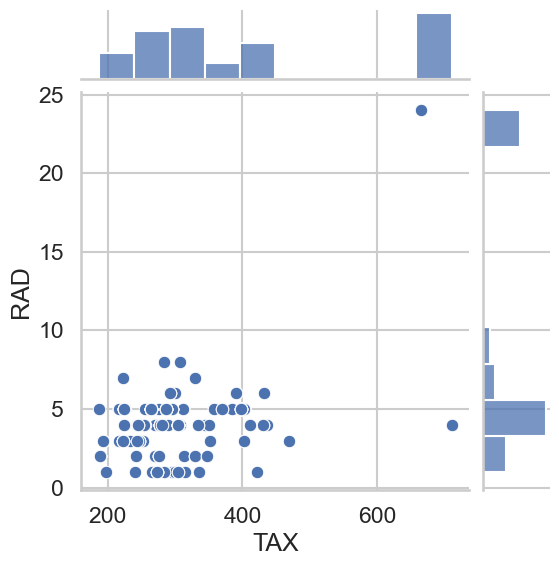

In [41]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("talk")
sns.jointplot(x=data['TAX'],y=data['RAD'])


plt.show()

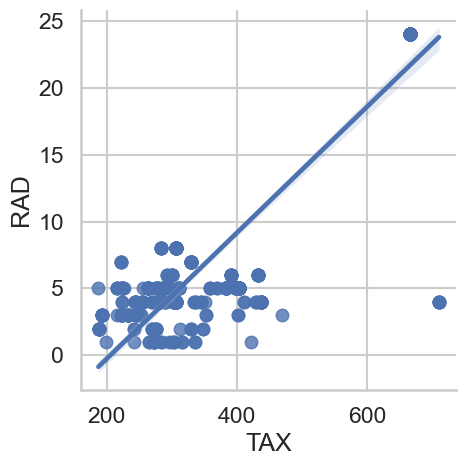

In [42]:
sns.lmplot(x="TAX",y="RAD",data=data)
plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


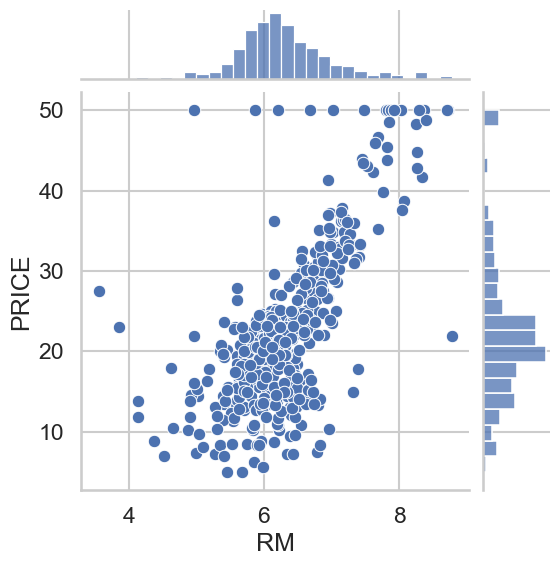

In [43]:
# numbers of room RM and PRICE
sns.jointplot(x="RM",y="PRICE",data=data)
plt.show()

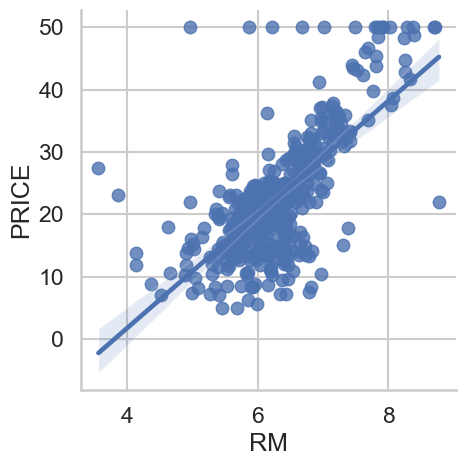

In [44]:
sns.set_style()
sns.lmplot(x="RM",y="PRICE",data=data)
plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

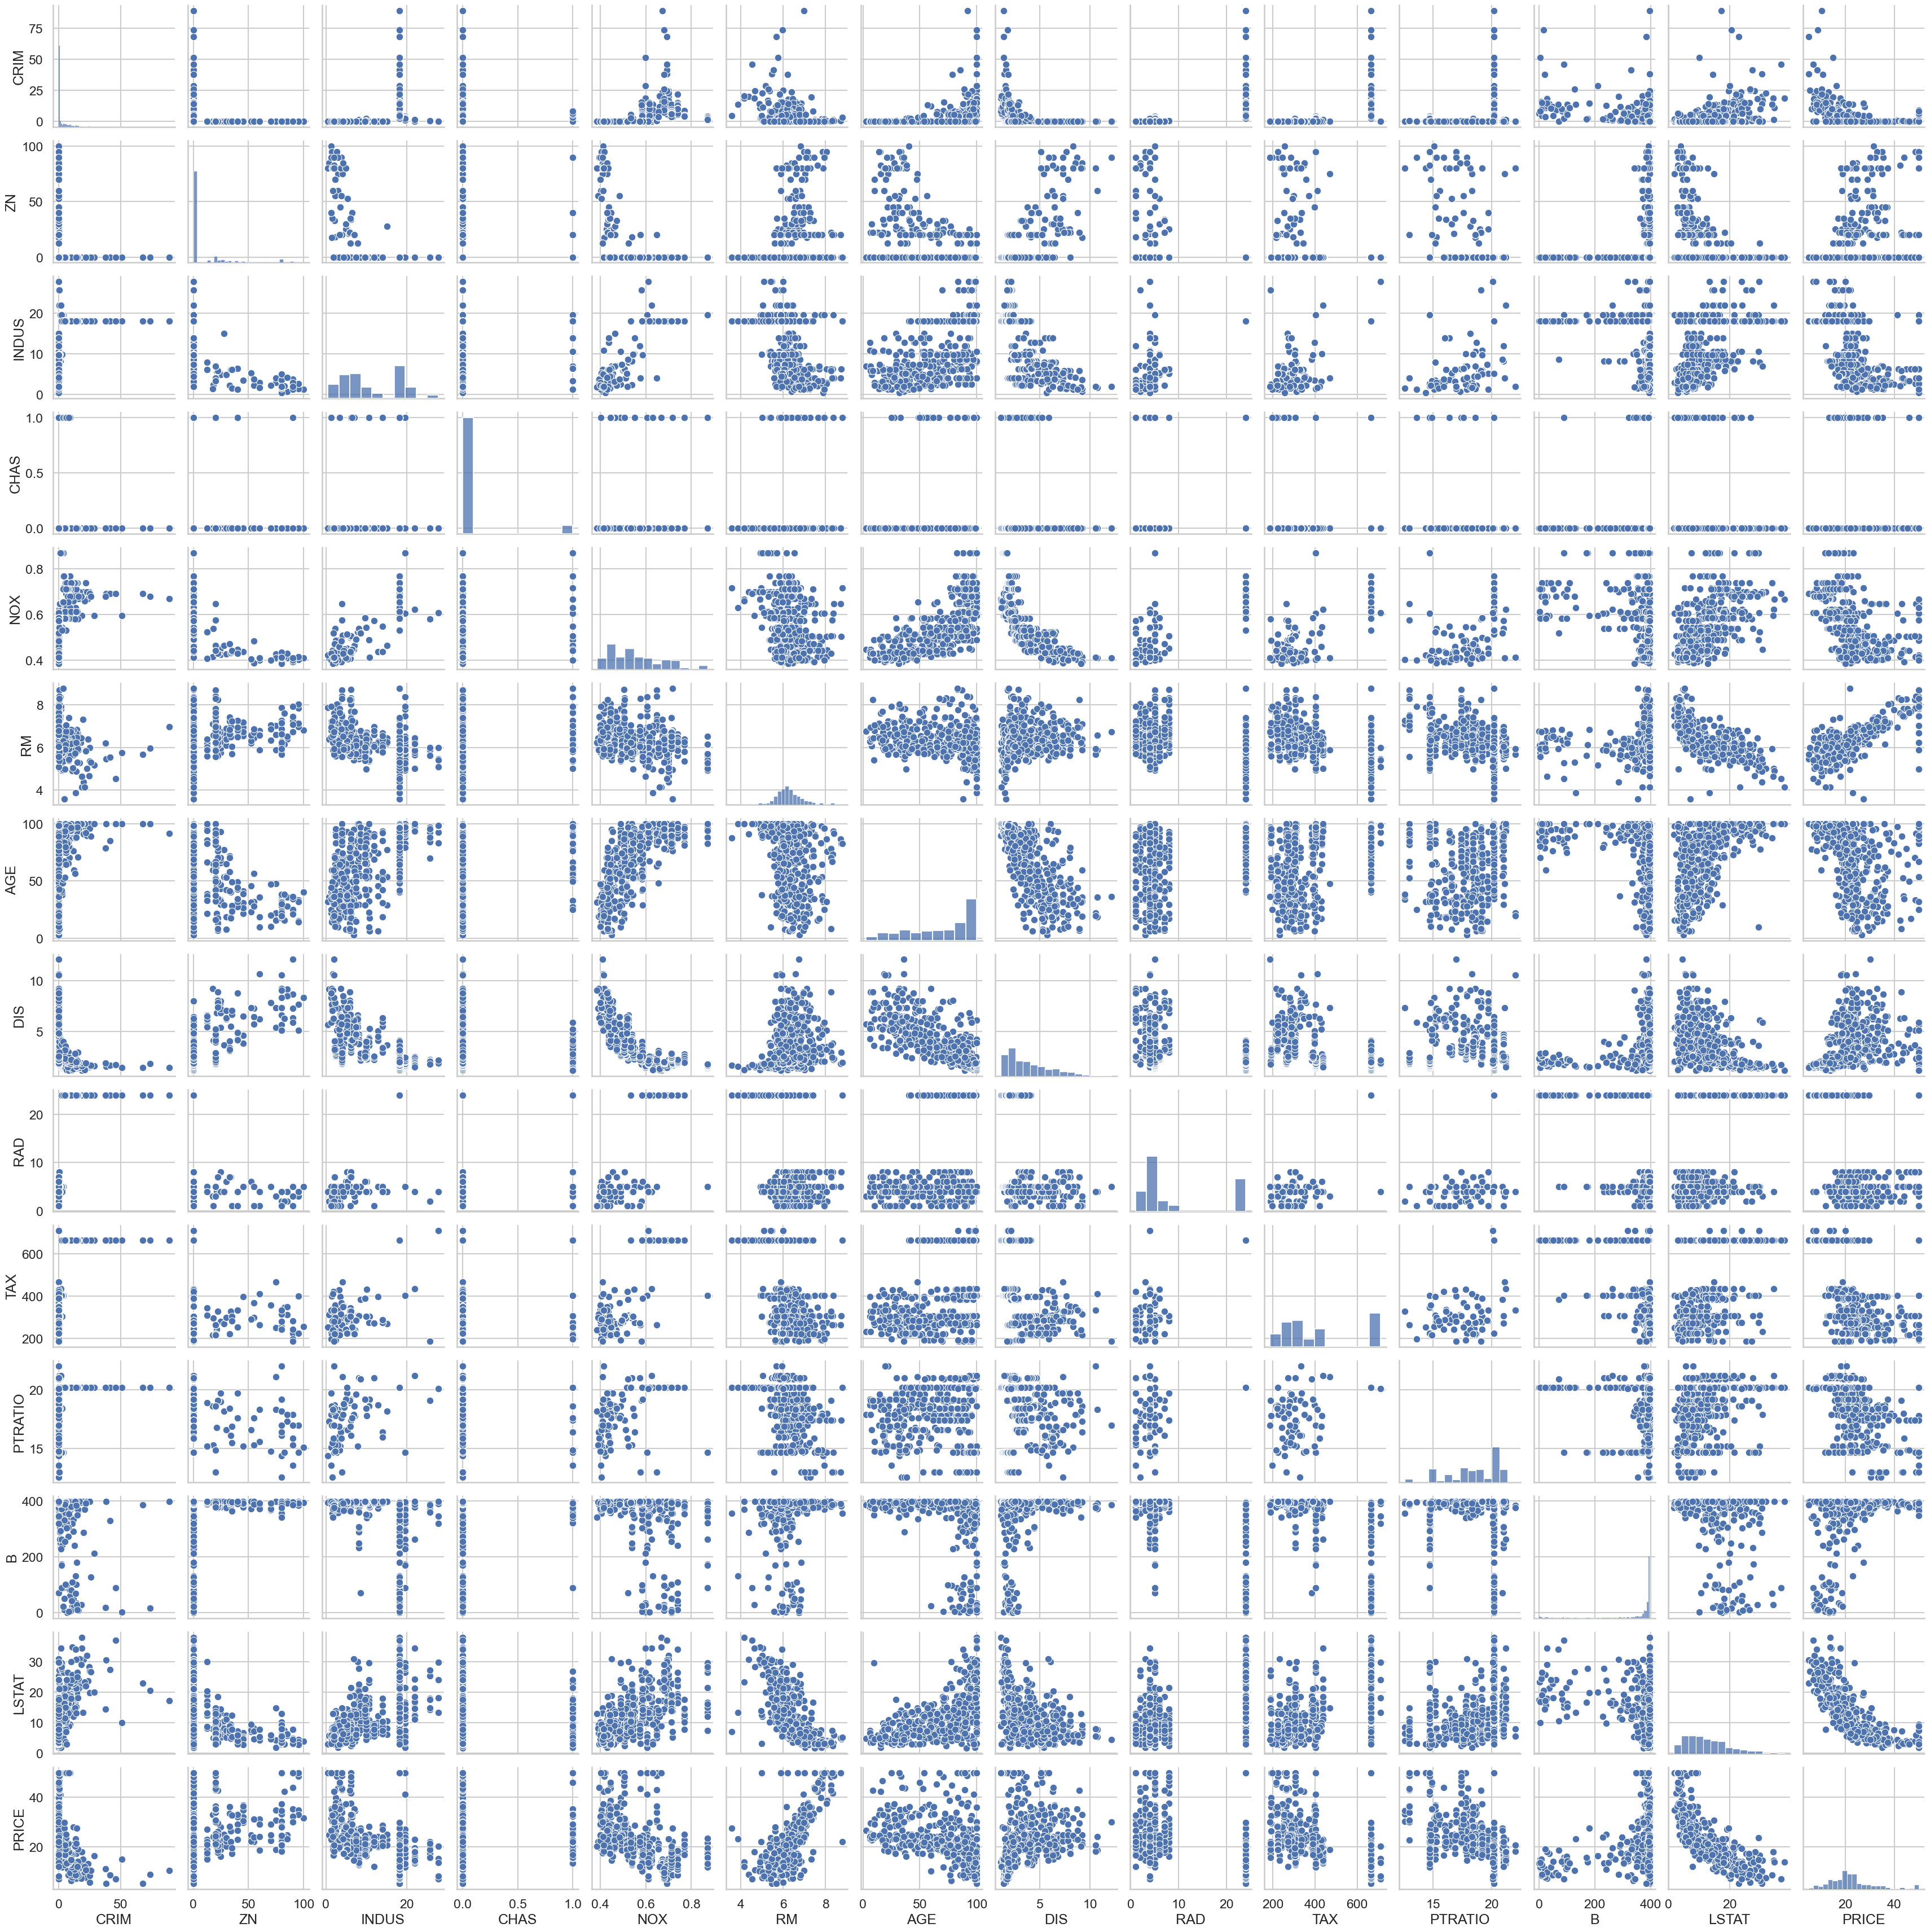

In [45]:
sns.pairplot(data)
plt.show()

/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

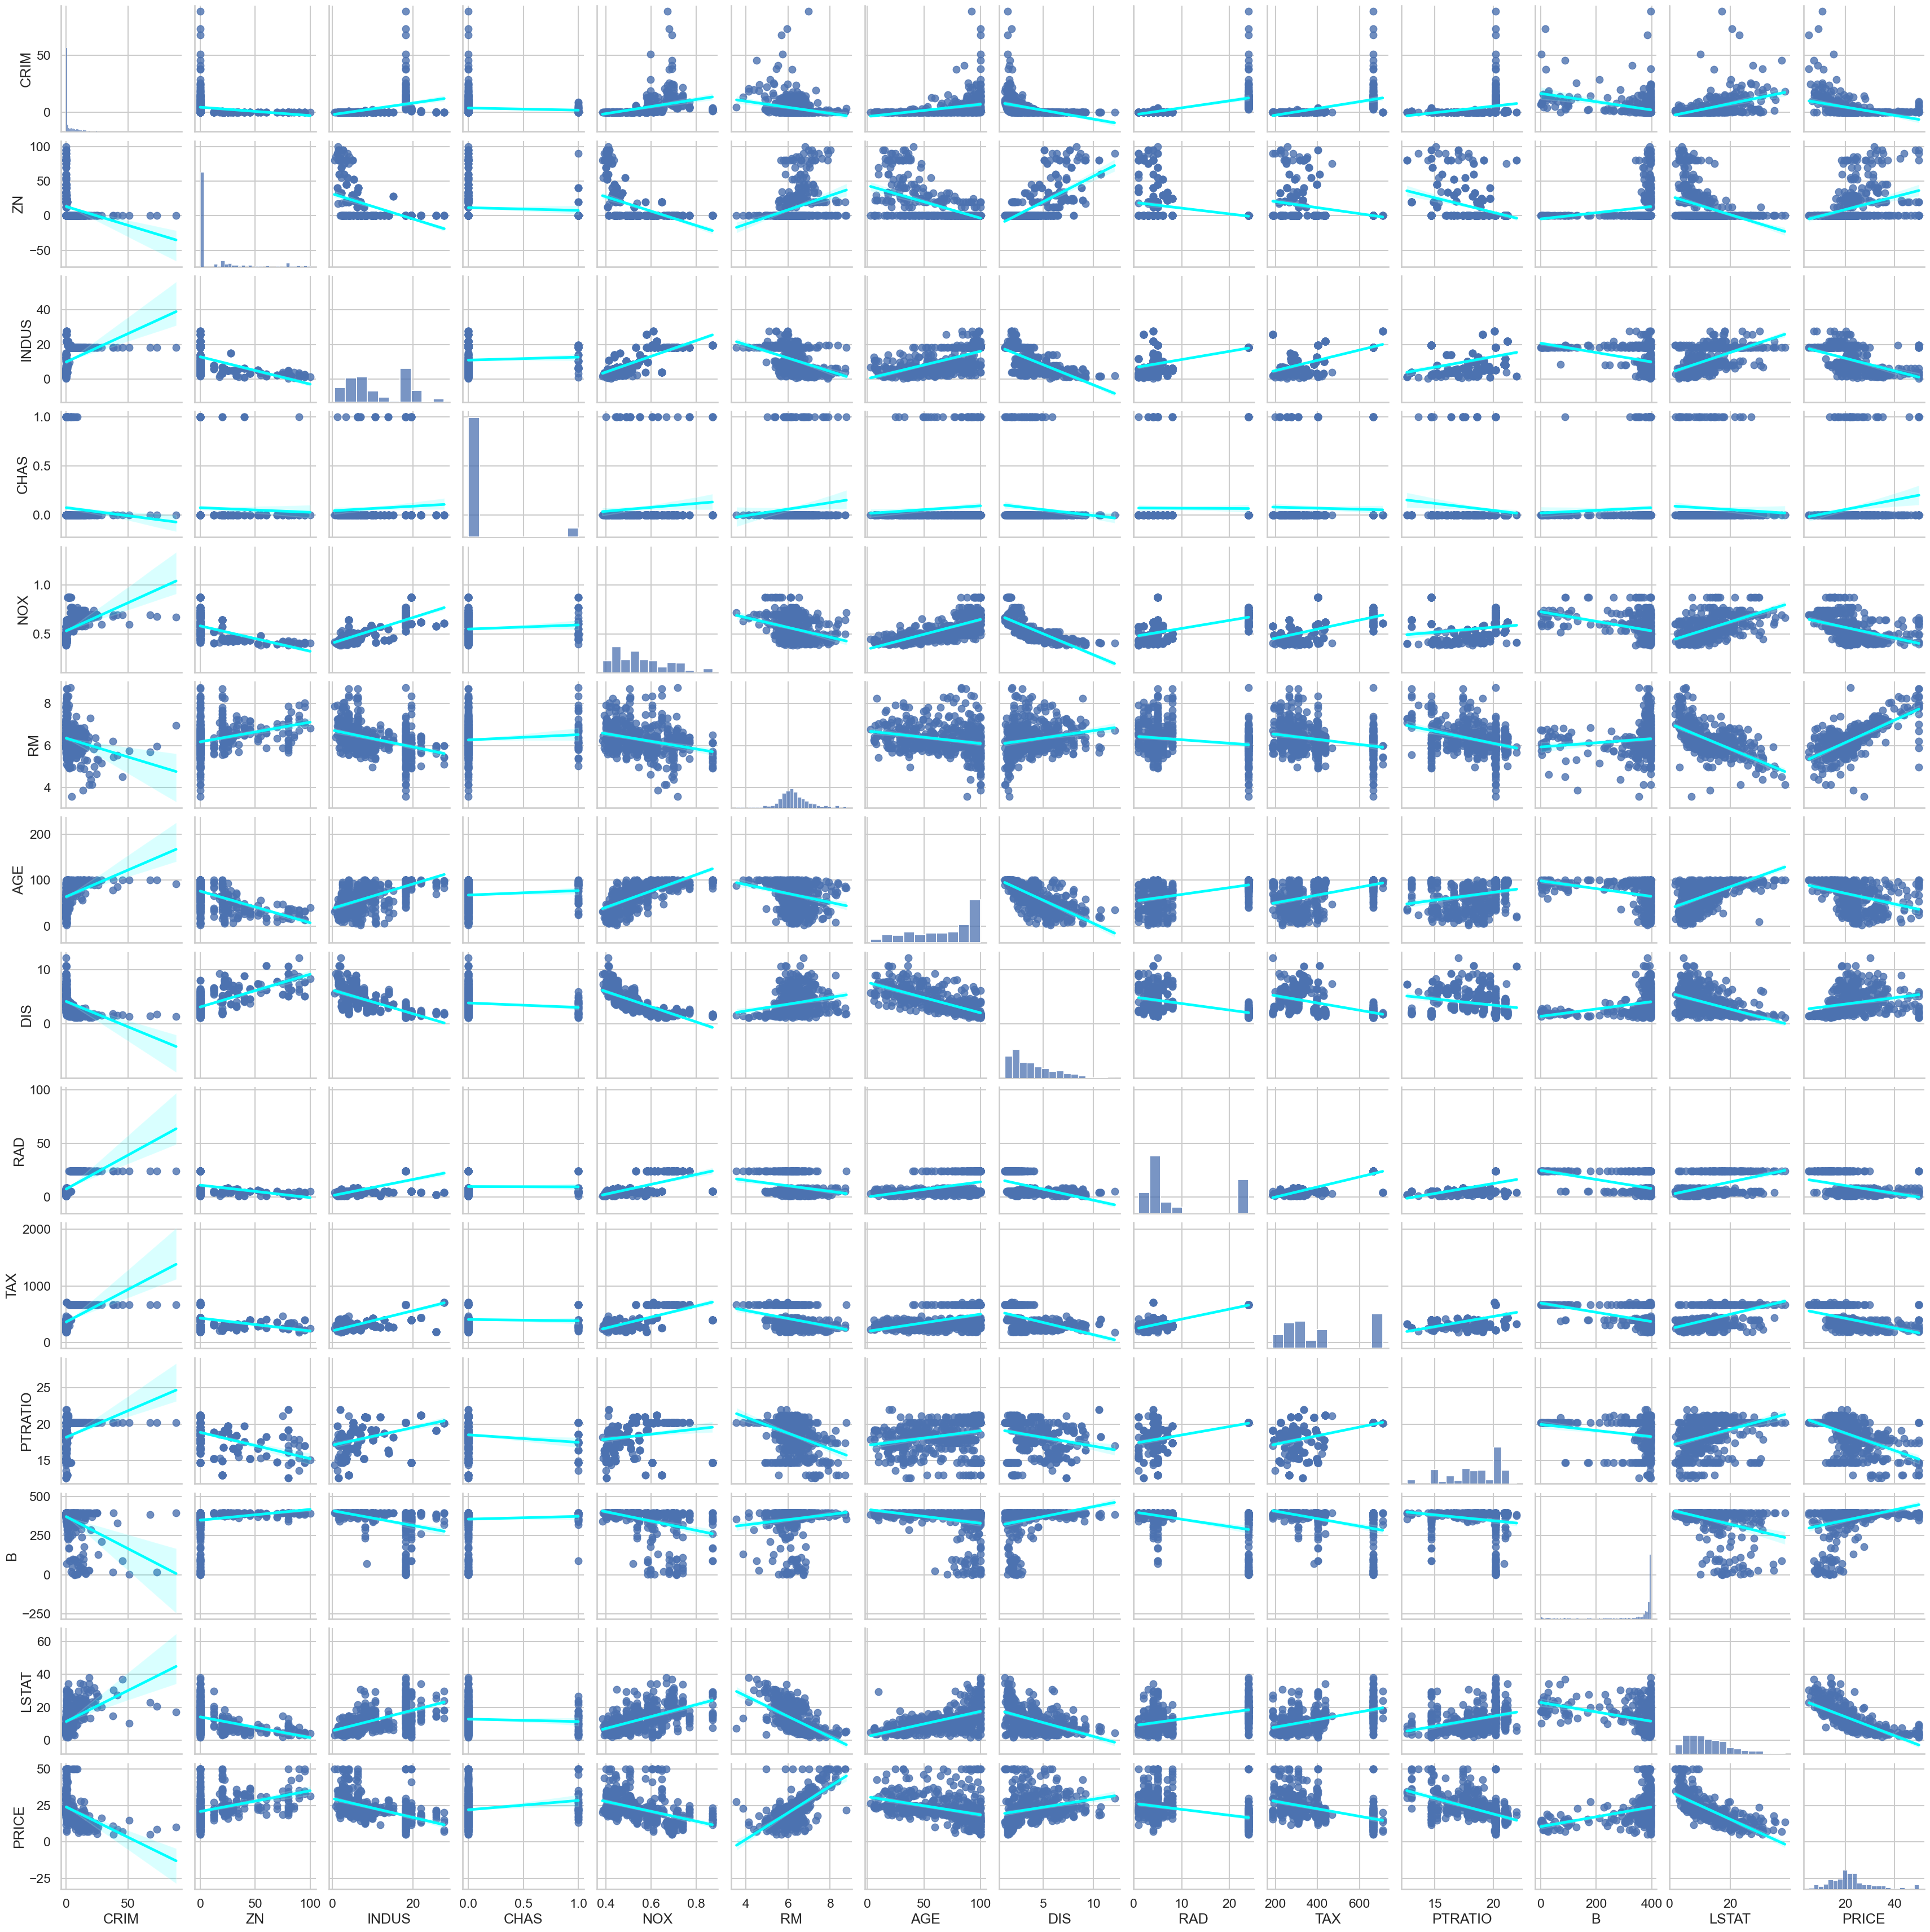

CPU times: user 17.3 s, sys: 90.1 ms, total: 17.4 s
Wall time: 16.6 s


In [46]:
%%time
sns.pairplot(data,kind = 'reg',plot_kws={"line_kws":{'color':'cyan'}})
plt.show()

## Training and Data set split

In [47]:
prices = data["PRICE"]
features = data.drop("PRICE",axis = 1)
features

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [48]:
x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

In [49]:
x_train

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     PTRATIO       B  LSTAT  
50      16.8  395.56  13.45  
367     20.2  131.42  13.33  
34      21.0  248.31  20.34  
78      18.7  386.40  12.34  
172     16.6  396.90  14.69  
..       ...     ...    ...  
320     19.6  396.90   7.20  
15      21.0  395.62   8.47  
484     20.2  370.73  13.34  
125     19.1  385.02  14.81  
265     13.0  392.40  10.45  

[404 rows x 13 columns]

## Multivariable Regression

In [50]:
regr = LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

In [51]:
print(regr.intercept_)
pd.DataFrame(data=regr.coef_,index = x_train.columns,columns=['coef'])

36.533051382824496


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [52]:
print("R-square for train data",regr.score(x_train,y_train))
print("R-square for test data",regr.score(x_test,y_test))

R-square for train data 0.750121534530608
R-square for test data 0.6709339839115633


In [53]:
df = {'Actual': y_test, 'Predicted': regr.predict(x_test)}
df = pd.DataFrame(df)
print(df)

     Actual  Predicted
305    28.4  31.078964
193    31.1  31.721694
65     23.5  30.873149
349    26.6  22.282350
151    19.6  18.856061
..      ...        ...
208    24.4  22.417851
174    22.6  26.727575
108    19.8  23.201172
242    22.2  23.918538
102    18.6  19.614334

[102 rows x 2 columns]


## Data transformations 

In [54]:
data['PRICE'].skew()

1.1080984082549072

In [55]:
y_log = np.log(data['PRICE'])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [56]:
y_log.skew()

-0.33032129530987864

/var/folders/4z/t4chh2lj2zx1t1nyf14pwhw00000gn/T/ipykernel_8241/503692951.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_log)
/Users/yuriipolulikh/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


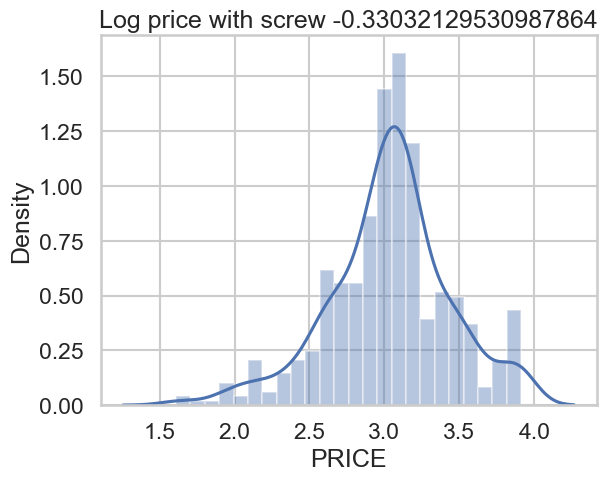

In [57]:
sns.distplot(y_log)
plt.title(f"Log price with screw {y_log.skew()}")
plt.show()

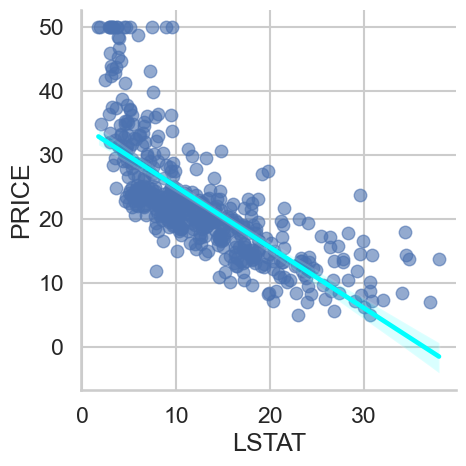

In [58]:
sns.lmplot(x='LSTAT',y = "PRICE",data = data,scatter_kws={'alpha':0.6},line_kws={'color':'cyan'})
plt.show()

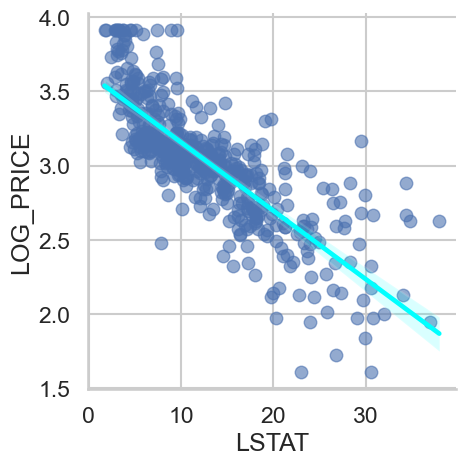

In [59]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log


sns.lmplot(x='LSTAT',y = "LOG_PRICE",data = transformed_data,scatter_kws={'alpha':0.6},line_kws={'color':'cyan'})
plt.show()

## Regression using log prices

In [60]:
prices = np.log(data['PRICE']) # Use log data
features = data.drop('PRICE',axis = 1)

x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

regr = LinearRegression()
regr.fit(x_train,y_train)

print(regr.intercept_)
print("R-square for train data",regr.score(x_train,y_train))
print("R-square for test data",regr.score(x_test,y_test))
pd.DataFrame(data=regr.coef_,index = x_train.columns,columns=['coef'])

4.059943871775193
R-square for train data 0.7930234826697584
R-square for test data 0.7446922306260724


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [61]:
# CHAS 	0.080331
# Charles River Property Premium
np.e ** 0.080331

1.0836456950439142

## P-values & Evaluating Coefficients

In [62]:
x_include_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_include_const)

results = model.fit()

# results.params # coefs 
# results.pvalues # p values
pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity 

$$ TAX = \alpha _0 + alpha _1 RM + \alpha _ 2 NOX + ... \alpha _12 LSTAT$$

$$ VIF _{TAX} = \frac{1}{1 - R _{TAX} ^ 2}$$ R - R-Square coef

In [63]:
# variance_inflation_factor(exog=x_include_const,exog_idx=1)

for i in range(1,x_include_const.shape[1]):
    print(variance_inflation_factor(exog=x_include_const,exog_idx=i))

1.7145250443932494
2.3328224265597597
3.9434488226746396
1.0788133385000582
4.410320817897638
1.8404053075678564
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.338671325536471
2.812544292793035


In [64]:
vif = []
for i in range(x_include_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_include_const,exog_idx=i))
    

In [65]:
pd.DataFrame({'coef_name':x_include_const.columns,'VIF': np.around(vif)})

coef_name    VIF
0      const  598.0
1       CRIM    2.0
2         ZN    2.0
3      INDUS    4.0
4       CHAS    1.0
5        NOX    4.0
6         RM    2.0
7        AGE    3.0
8        DIS    4.0
9        RAD    7.0
10       TAX    9.0
11   PTRATIO    2.0
12         B    1.0
13     LSTAT    3.0

## Model Simplification & the BIC

In [66]:
## Original model with log prices and all feature
x_include_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_include_const)

results = model.fit()

org_coef = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

print("BIC:",results.bic)
print("P-values:",results.rsquared)

BIC: -139.7499776947892
P-values: 0.7930234826697584


In [67]:
## Reduced model #1 excluding INDUS

x_include_const = sm.add_constant(x_train)
x_include_const = x_include_const.drop(["INDUS"],axis=1)
model = sm.OLS(y_train,x_include_const)

results = model.fit()

coef_minus_indus = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

print("BIC:",results.bic)
print("P-values:",results.rsquared)

BIC: -145.14508855591185
P-values: 0.7927126289415164


In [68]:
## Reduced model #2 excluding AGE and INDUS

x_include_const = sm.add_constant(x_train)
x_include_const = x_include_const.drop(["AGE","INDUS"],axis=1)
model = sm.OLS(y_train,x_include_const)

results = model.fit()

coef_minus_age = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

print("BIC:",results.bic)
print("P-values:",results.rsquared)

BIC: -149.49934294224656
P-values: 0.7918657661852814


In [69]:
frames = [org_coef,coef_minus_indus,coef_minus_age]
pd.concat(frames,axis = 1)


coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals $ Residual Plots

In [70]:
# modified model transformed using log prices and dropping two features.
prices = np.log(data['PRICE']) # Use log data
features = data.drop(['PRICE','INDUS','AGE'],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

# Using statsModel
x_include_const = sm.add_constant(x_train)

model = sm.OLS(y_train,x_include_const)
results = model.fit()
# Residuals 
residuals = y_train - results.fittedvalues
results.resid



50    -0.056143
367    0.498215
34    -0.033868
78     0.043520
172    0.033242
         ...   
320   -0.041251
15    -0.033156
484    0.074891
125    0.008542
265   -0.214594
Length: 404, dtype: float64

In [71]:
residuals.describe()

count    4.040000e+02
mean    -3.034426e-15
std      1.841779e-01
min     -7.330963e-01
25%     -9.881733e-02
50%     -1.499545e-02
75%      9.870289e-02
max      7.907087e-01
dtype: float64

In [72]:
# graph of Actual vs Predicted Prices
corr = round(y_train.corr(results.fittedvalues),2)
corr

0.89

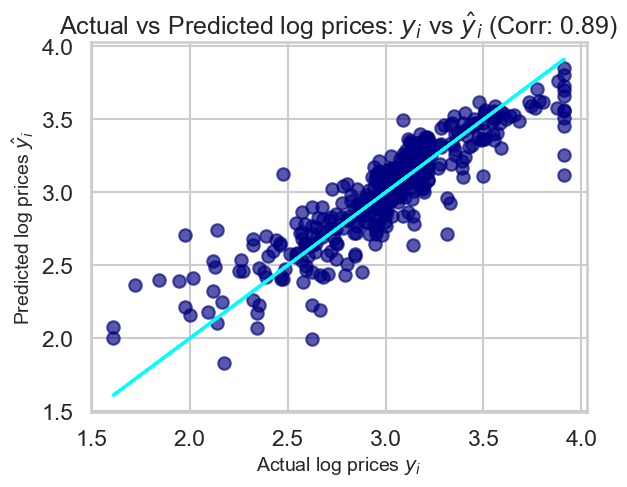

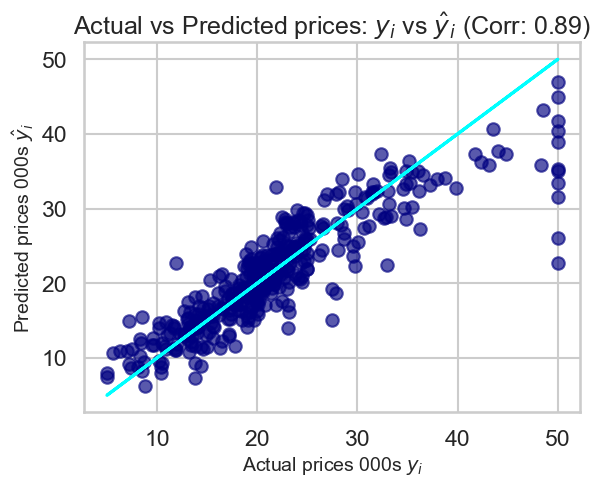

MEAN: 0.035
R-square: 0.792


In [73]:
plt.scatter(x=y_train,y = results.fittedvalues, c = 'navy',alpha = 0.65)

plt.plot(y_train,y_train,c='cyan' )
plt.title(f'Actual vs Predicted log prices: $y_i$ vs $\hat y_i$ (Corr: {corr})')
plt.xlabel('Actual log prices $y _i$',fontsize = 14)
plt.ylabel('Predicted log prices $\hat y _i$',fontsize =14)
plt.show()


plt.scatter(x=np.e**y_train,y = np.e**results.fittedvalues, c = 'navy',alpha = 0.65)

plt.plot(np.e**y_train,np.e**y_train,c='cyan' )
plt.title(f'Actual vs Predicted prices: $y_i$ vs $\hat y_i$ (Corr: {corr})')
plt.xlabel('Actual prices 000s $y _i$',fontsize = 14)
plt.ylabel('Predicted prices 000s $\hat y _i$',fontsize =14)
plt.show()

# MEAN squared error & R-square
reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsquare = round(results.rsquared,3)

print("MEAN:",reduced_log_mse)
print("R-square:",reduced_log_rsquare)

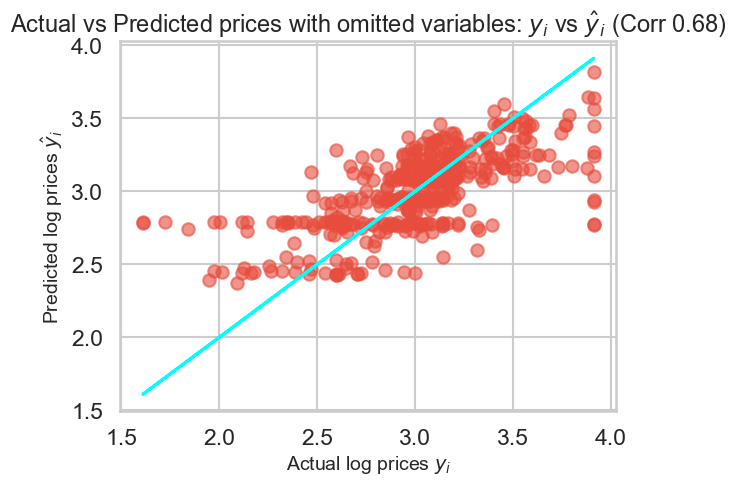

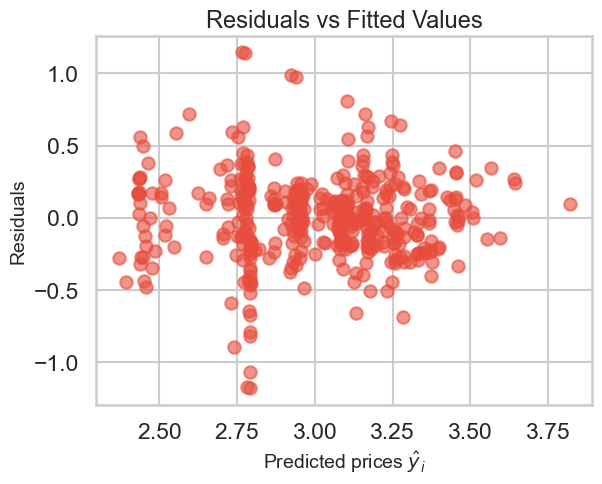

In [74]:
# Model Omitting Key Features using log prices
prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE', 'LSTAT', 'RM', 'NOX', 'CRIM'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

# Graph of Actual vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.scatter(x=y_train, y=results.fittedvalues, c='#e74c3c', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')

plt.xlabel('Actual log prices $y _i$', fontsize=14)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices with omitted variables: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)

plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [75]:
# Here is an example when we want to get lower and higher bound 

print('1 s.d. in log prices is', np.sqrt(reduced_log_mse))
print('2 s.d. in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for a 95% prediction interval is ', upper_bound)
print('The upper bound in normal prices is $', np.e**upper_bound * 1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for a 95% prediction interval is ', lower_bound)
print('The lower bound in normal prices is $', np.e**lower_bound * 1000)

1 s.d. in log prices is 0.18708286933869708
2 s.d. in log prices is 0.37416573867739417
The upper bound in log prices for a 95% prediction interval is  3.7753631203395495
The upper bound in normal prices is $ 43613.34233239937
The lower bound in log prices for a 95% prediction interval is  3.0270316429847615
The lower bound in normal prices is $ 20635.886906824155


In [76]:
30000 + np.e**(2*np.sqrt(reduced_log_mse)) * 1000 # approx value 

31453.778077746647